<a href="https://colab.research.google.com/github/Reyanshi24/-Indian-State-Level-Election-Data-Analysis/blob/main/detailed_election_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df_state=pd.read_csv('sample_data/indian-state-level-election.csv')
df_nat=pd.read_csv('sample_data/indian-national-level-election.csv')

# Election Performance Analysis

In this notebook, I have performed a detailed analysis on the State-Level Election Dataset. The analysis includes various visualizations and insights such as:

*Voter turnout analysis per state*
*State-wise gender representation*
*Party dominance and performance per state*
The National-Level Election Dataset will be uploaded separately, as combining both datasets in one file would have made it too large. You can refer to the National dataset in a separate notebook link once it's uploaded.

Stay tuned for the national dataset analysis

In [3]:
df_state.head()


,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247.0
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247.0
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247.0
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247.0
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247.0


In [4]:
df_state.shape

(293422, 11)

In [5]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293422 entries, 0 to 293421
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     293422 non-null  object 
 1   year        293422 non-null  float64
 2   ac_no       293422 non-null  int64  
 3   ac_name     277339 non-null  object 
 4   ac_type     293422 non-null  object 
 5   cand_name   293422 non-null  object 
 6   cand_sex    288120 non-null  object 
 7   partyname   293422 non-null  object 
 8   partyabbre  290715 non-null  object 
 9   totvotpoll  293414 non-null  float64
 10  electors    293421 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 24.6+ MB


In [6]:
df_state['partyname'].value_counts()

,count
partyname,
Independent,76004
Independents,52433
IND,22588
Indian National Congress,19302
Bahujan Samaj Party,7108
...,...
Telugu Desam Party,1
Samajwadi Party (M),1
All India Kisan Majdoor Sabha,1


# Data Preprocessing


In [7]:
df_state['partyname'] = df_state['partyname'].replace({
    'Independents': 'Independent',
    'independent': 'Independent',
    'IND.': 'Independent'
})


In [8]:
df_state.isnull().sum()

,0
st_name,0
year,0
ac_no,0
ac_name,16083
ac_type,0
cand_name,0
cand_sex,5302
partyname,0
partyabbre,2707
totvotpoll,8


In [9]:
# Convert 'year' to integer
df_state['year'] = df_state['year'].astype(int)

# Fill missing 'cand_sex' and 'partyabbre' with 'Unknown'
df_state['cand_sex'] = df_state['cand_sex'].fillna('Unknown')
df_state['partyabbre'] = df_state['partyabbre'].fillna('Unknown')

# Drop rows with missing 'totvotpoll'
df_state = df_state.dropna(subset=['totvotpoll'])


In [10]:
# Check how many unique (st_name, ac_no) pairs have a single ac_name
ac_name_group_check = df_state.groupby(['st_name', 'ac_no'])['ac_name'].nunique()
print(ac_name_group_check.value_counts().head(10))


ac_name
2    2263
1     921
3     651
4     102
5      12
Name: count, dtype: int64


In [11]:
# Check rows where ac_name is missing
print(df_state[df_state['ac_name'].isna()].head())


            st_name  year  ac_no ac_name ac_type                 cand_name  \
159388  Maharashtra  1978      1     NaN     GEN      Sawant Balkrishna R.   
159389  Maharashtra  1978      1     NaN     GEN   Sawant Sawlaram Rajaram   
159390  Maharashtra  1978      1     NaN     GEN  Vasant Sita Ram Kesarkar   
159391  Maharashtra  1978      1     NaN     GEN  Bhalchandra Anant Sawant   
159392  Maharashtra  1978      1     NaN     GEN  Mathkar Jayanand Shivram   

       cand_sex                     partyname partyabbre  totvotpoll  electors  
159388        M  Indian National Congress (I)     INC(I)       930.0  100163.0  
159389        M                   Independent        IND      1406.0  100163.0  
159390        M                   Independent        IND      2203.0  100163.0  
159391        M      Indian National Congress        INC     20992.0  100163.0  
159392        M                  Janata Party        JNP     41331.0  100163.0  


In [12]:
# Step 1: Build mapping of (st_name, ac_no) to most common ac_name
ac_name_map = (
    df_state[~df_state['ac_name'].isna()]
    .groupby(['st_name', 'ac_no'])['ac_name']
    .agg(lambda x: x.value_counts().idxmax())
)

# Step 2: Fill missing ac_name using that mapping
def fill_ac_name(row):
    if pd.isna(row['ac_name']):
        return ac_name_map.get((row['st_name'], row['ac_no']), np.nan)
    return row['ac_name']

df_state['ac_name'] = df_state.apply(fill_ac_name, axis=1)

# Step 3: Check remaining missing values
print("Missing ac_name after fill:", df_state['ac_name'].isna().sum())


Missing ac_name after fill: 0


In [13]:
df_state.isnull().sum()

,0
st_name,0
year,0
ac_no,0
ac_name,0
ac_type,0
cand_name,0
cand_sex,0
partyname,0
partyabbre,0
totvotpoll,0


In [14]:
df_nat.shape

(73081, 11)

In [15]:
df_nat.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [16]:
df_nat.isnull().sum()

,0
st_name,0
year,0
pc_no,0
pc_name,0
pc_type,8070
cand_name,0
cand_sex,542
partyname,0
partyabbre,0
totvotpoll,0


In [17]:
df_nat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73081 entries, 0 to 73080
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   st_name     73081 non-null  object
 1   year        73081 non-null  int64 
 2   pc_no       73081 non-null  int64 
 3   pc_name     73081 non-null  object
 4   pc_type     65011 non-null  object
 5   cand_name   73081 non-null  object
 6   cand_sex    72539 non-null  object
 7   partyname   73081 non-null  object
 8   partyabbre  73081 non-null  object
 9   totvotpoll  73081 non-null  int64 
 10  electors    73081 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [18]:
df_nat['pc_type'].value_counts()

,count
pc_type,
GEN,54862
SC,7293
ST,2841
SC,15


In [19]:
df_nat['pc_type'] = df_nat['pc_type'].fillna('GEN')



In [20]:
df_nat['cand_sex'].value_counts()


,count
cand_sex,
M,68885
F,3648
O,6


In [21]:
df_nat['cand_sex'] = df_nat['cand_sex'].fillna('M')


In [22]:
df_nat['partyname'].value_counts()

,count
partyname,
Independent,31458
IND,5619
Independents,4050
Indian National Congress,3919
Bharatiya Janata Party,2329
...,...
BCP,1
UPP,1
raup,1


In [23]:
df_state['partyname'] = df_state['partyname'].replace({
    'Independents': 'Independent',
    'independent': 'Independent',
    'IND': 'Independent'
})



# 1. Candidate & Voter Insights
   ### 1.1 Unique Counts

  

   ### 1.3 Candidate Gender Distribution

   ### 1.4 Average Candidates per Seat per Year

   ### 1.5 Voter Turnout Analysis






 ## 1.1 Unique Counts

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)


In [25]:
print("Unique States:", df_state['st_name'].nunique())
print("Years Covered:", df_state['year'].nunique())
print("Total Constituencies:", df_state['ac_no'].nunique())
print("Total Unique Parties:", df_state['partyname'].nunique())
print("Total Unique Candidates:", df_state['cand_name'].nunique())


Unique States: 28
Years Covered: 36
Total Constituencies: 425
Total Unique Parties: 1423
Total Unique Candidates: 202108


In [26]:
df_state['st_name'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'National Capital Territory Of Delhi', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh'], dtype=object)

## 1.2 Party-wise Candidate Count (Top 10)


/tmp/ipython-input-2613873941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_parties.values, y=top_parties.index, palette='rocket')


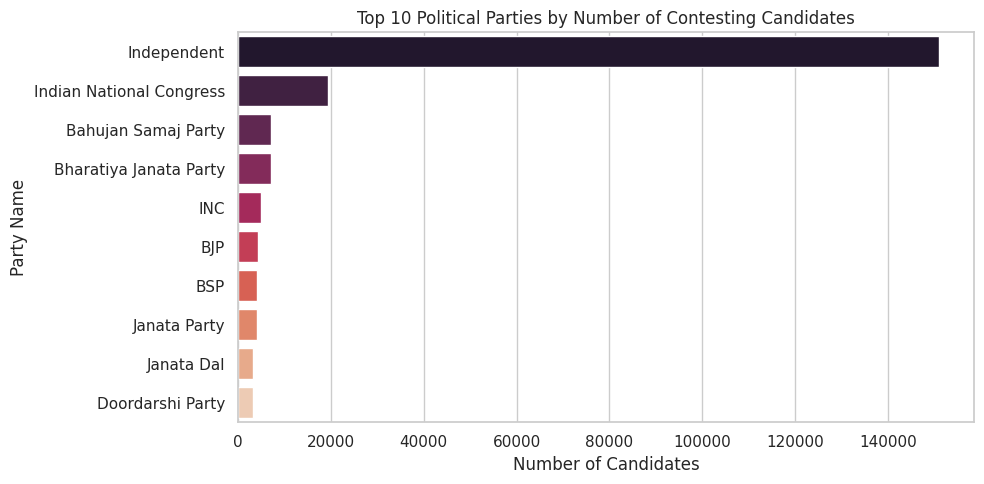

In [27]:
top_parties = df_state['partyname'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_parties.values, y=top_parties.index, palette='rocket')
plt.title('Top 10 Political Parties by Number of Contesting Candidates')
plt.xlabel('Number of Candidates')
plt.ylabel('Party Name')
plt.tight_layout()
plt.show()


   ## 1.3 Candidate Gender Distribution

/tmp/ipython-input-834105004.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cand_sex', data=df_state, palette='pastel')


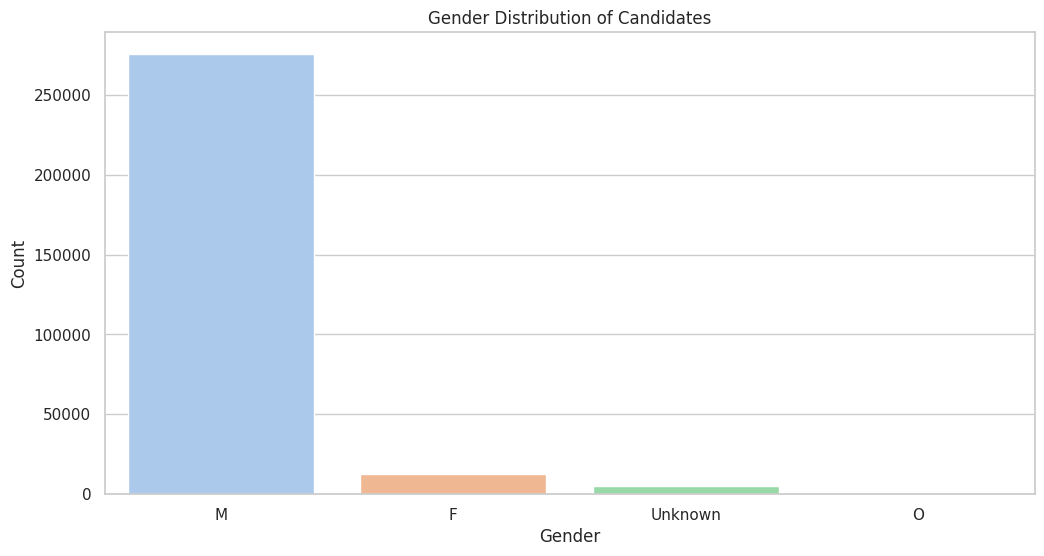

In [28]:
sns.countplot(x='cand_sex', data=df_state, palette='pastel')
plt.title('Gender Distribution of Candidates')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



   ## 1.4 Average Candidates per Seat per Year

   

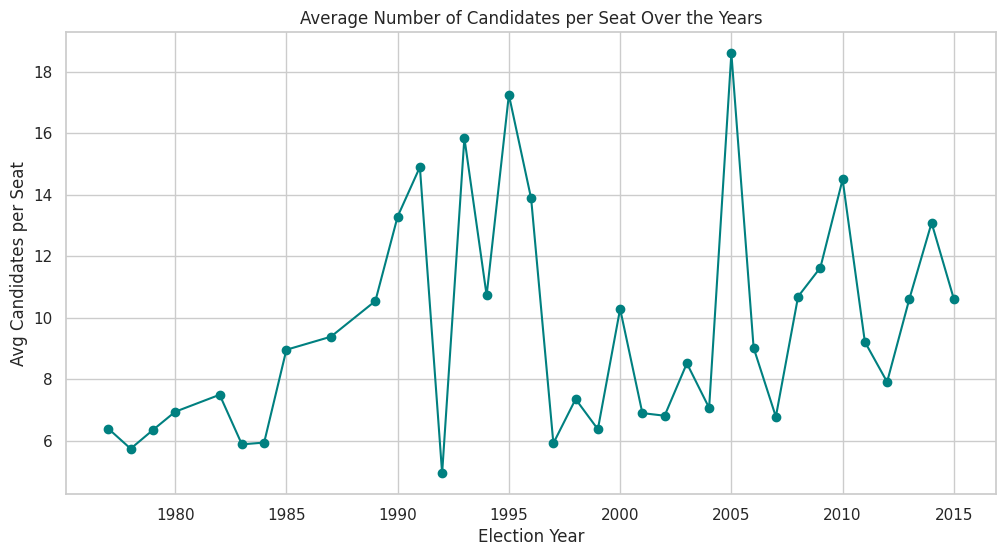

In [29]:
cands_per_seat = df_state.groupby(['year', 'st_name', 'ac_no']).size().reset_index(name='num_candidates')
avg_per_year = cands_per_seat.groupby('year')['num_candidates'].mean()

plt.plot(avg_per_year.index, avg_per_year.values, marker='o', color='teal')
plt.title('Average Number of Candidates per Seat Over the Years')
plt.xlabel('Election Year')
plt.ylabel('Avg Candidates per Seat')
plt.grid(True)
plt.show()



  
   ## 1.5 Voter Turnout Analysis

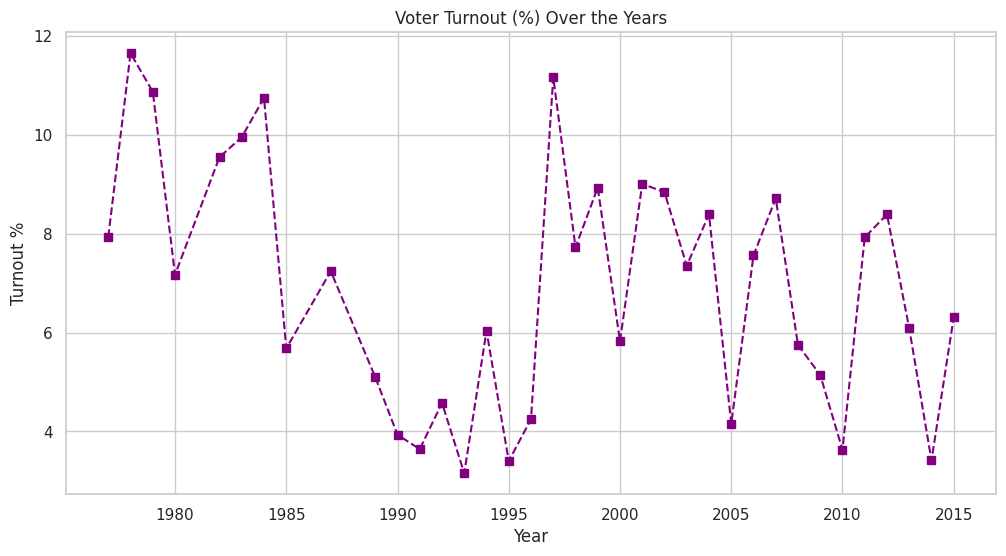

In [30]:
# Total votes polled vs electors by year
turnout = df_state.groupby('year')[['totvotpoll', 'electors']].sum()
turnout['turnout_percent'] = (turnout['totvotpoll'] / turnout['electors']) * 100

plt.plot(turnout.index, turnout['turnout_percent'], marker='s', linestyle='--', color='purple')
plt.title('Voter Turnout (%) Over the Years')
plt.ylabel('Turnout %')
plt.xlabel('Year')
plt.grid(True)
plt.show()


# 2.Election Results Insights
  

## 2.1 Winners Analysis

In [31]:
# Find the winner per constituency per year
winners = df_state.loc[df_state.groupby(['year', 'st_name', 'ac_no'])['totvotpoll'].idxmax()]

# Display the top winners
print(winners[['st_name', 'year', 'ac_no', 'cand_name', 'partyname', 'totvotpoll']].head())


      st_name  year  ac_no          cand_name                 partyname  \
31685   Bihar  1977      1     Har Deo Prasad  Indian National Congress   
31688   Bihar  1977      2    Narsingh Baitha  Indian National Congress   
31696   Bihar  1977      3  Arjun Bikram Shah  Indian National Congress   
31703   Bihar  1977      4     Sitaram Prasad  Indian National Congress   
31711   Bihar  1977      5      Faiyazul Azam  Indian National Congress   

       totvotpoll  
31685     16870.0  
31688     32058.0  
31696     27235.0  
31703     19389.0  
31711     28324.0  


## 2.2 Vote Share by Party

/tmp/ipython-input-2113241374.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_party_votes_share.index, y=top_party_votes_share.values, palette='viridis')


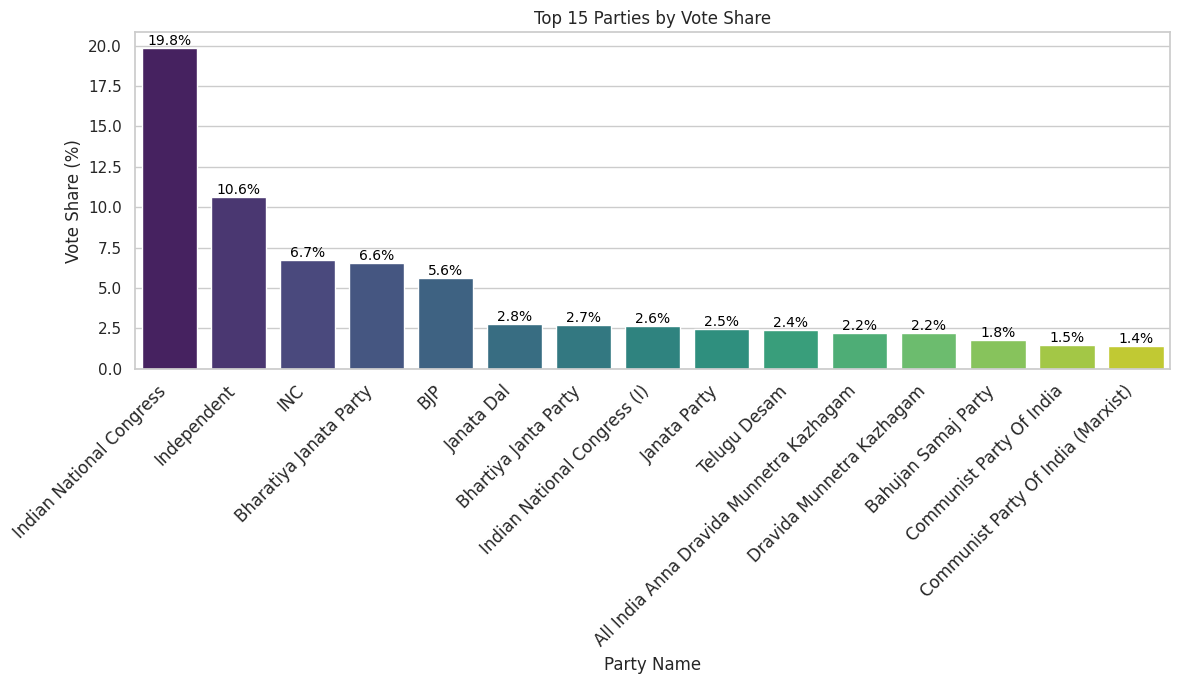

In [32]:


# Group by party and calculate total votes
party_votes = df_state.groupby('partyname')['totvotpoll'].sum().sort_values(ascending=False)

# Calculate vote share by party
total_votes = df_state['totvotpoll'].sum()
party_votes_share = (party_votes / total_votes) * 100

# Improved Visualization with Font Handling and Top N Parties
plt.figure(figsize=(12, 7))
top_n = 15  # Display the top 15 parties
top_party_votes_share = party_votes_share.head(top_n)

# Use a font that supports a wide range of characters (e.g., DejaVu Sans)
font_name = 'DejaVu Sans'  # Or try 'Arial Unicode MS' if available

ax = sns.barplot(x=top_party_votes_share.index, y=top_party_votes_share.values, palette='viridis')
plt.title(f'Top {top_n} Parties by Vote Share', fontdict={'fontname': font_name})
plt.xlabel('Party Name', fontdict={'fontname': font_name})
plt.ylabel('Vote Share (%)', fontdict={'fontname': font_name})
plt.xticks(rotation=45, ha='right', fontproperties={'family': font_name})  # Apply font to x-ticks

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()



## 2.3 State-Wise Insights

/tmp/ipython-input-1553838670.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_turnout = df_state.groupby('st_name').apply(lambda x: (x['totvotpoll'].sum() / x['electors'].sum()) * 100).sort_values(ascending=False)
/tmp/ipython-input-1553838670.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=state_turnout.values, y=state_turnout.index, palette='viridis') #swapped x and y


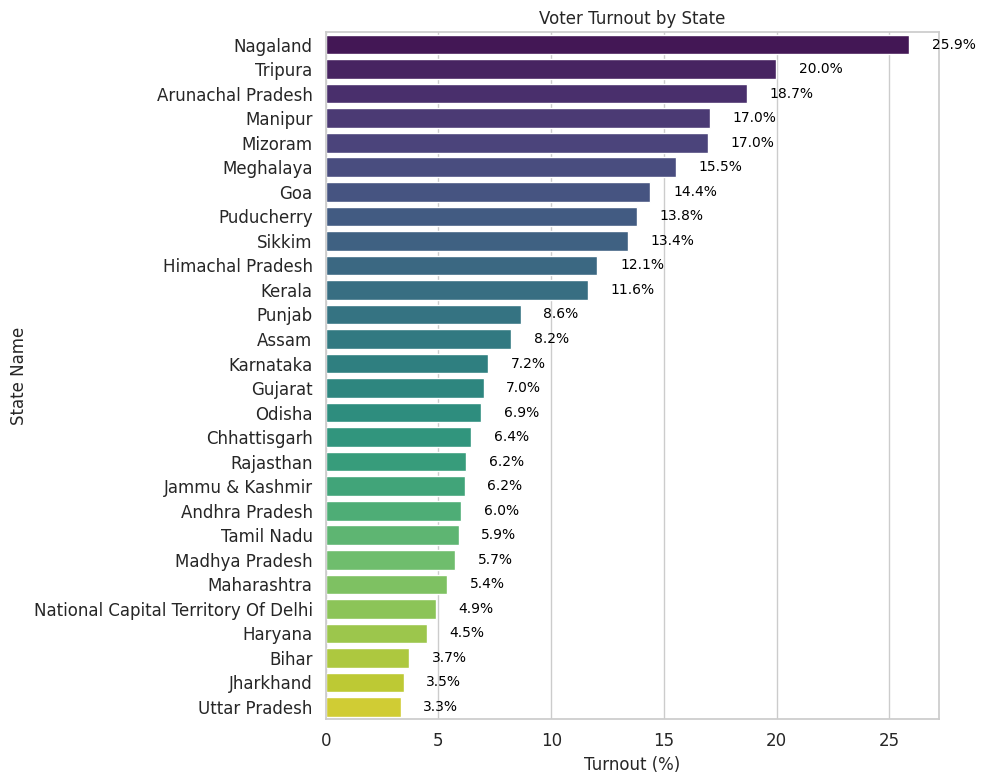

/tmp/ipython-input-1553838670.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=state_constituencies.values, y=state_constituencies.index, palette='plasma') #swapped x and y


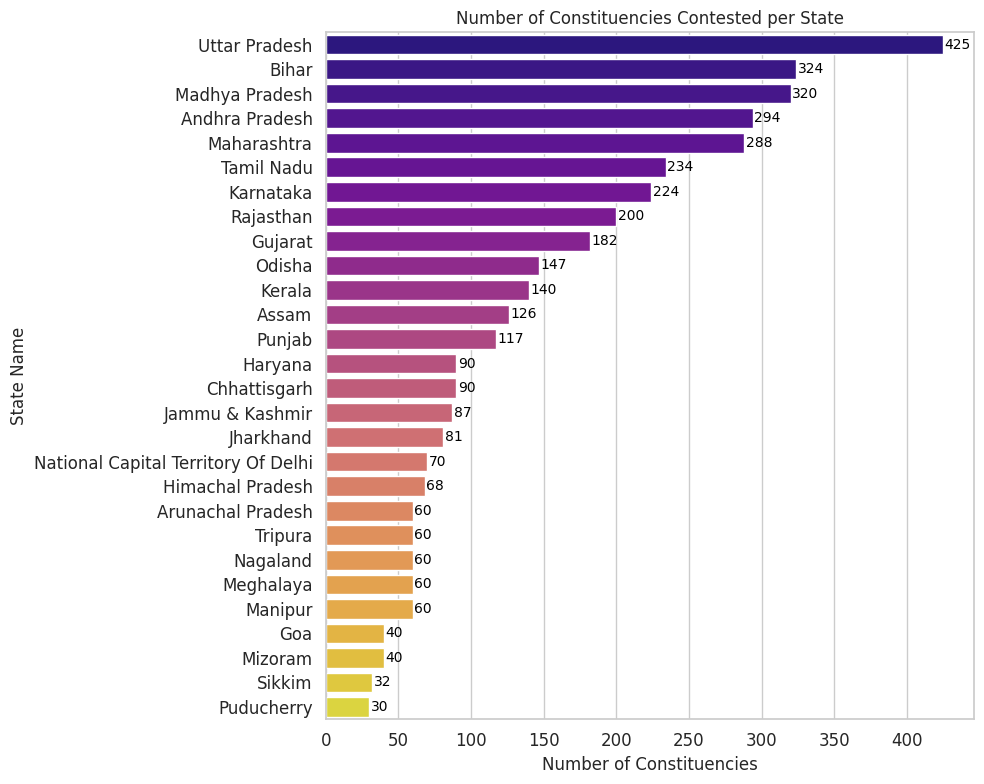

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total voter turnout per state
state_turnout = df_state.groupby('st_name').apply(lambda x: (x['totvotpoll'].sum() / x['electors'].sum()) * 100).sort_values(ascending=False)

# Total constituencies contested per state
state_constituencies = df_state.groupby('st_name')['ac_no'].nunique().sort_values(ascending=False)

font_name = 'DejaVu Sans'  # Or 'Arial Unicode MS'

# Plot voter turnout by state (HORIZONTAL BAR)
plt.figure(figsize=(10, 8))  # Adjust figure size for horizontal
ax1 = sns.barplot(x=state_turnout.values, y=state_turnout.index, palette='viridis') #swapped x and y
plt.title('Voter Turnout by State', fontdict={'fontname': font_name})
plt.xlabel('Turnout (%)', fontdict={'fontname': font_name})
plt.ylabel('State Name', fontdict={'fontname': font_name})
plt.xticks(fontproperties={'family': font_name})
plt.yticks(fontproperties={'family': font_name}) # added font to y-ticks

for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.1f}%', (p.get_width() + 1, p.get_y() + p.get_height() / 2),  # Adjusted x position
                ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

# Plot constituencies contested by state (HORIZONTAL BAR)
plt.figure(figsize=(10, 8))
ax2 = sns.barplot(x=state_constituencies.values, y=state_constituencies.index, palette='plasma') #swapped x and y
plt.title('Number of Constituencies Contested per State', fontdict={'fontname': font_name})
plt.xlabel('Number of Constituencies', fontdict={'fontname': font_name})
plt.ylabel('State Name', fontdict={'fontname': font_name})
plt.xticks(fontproperties={'family': font_name})
plt.yticks(fontproperties={'family': font_name}) # added font to y-ticks
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height() / 2),  # Adjusted x position
                ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()


# 3. Victory Margin & Party Trends
  

## 3.1 Winning Margins

In [34]:
# Find the second-highest vote count per constituency per year
second_highest_votes = df_state.groupby(['year', 'st_name', 'ac_no'])['totvotpoll'].apply(lambda x: x.nlargest(2).iloc[-1]).reset_index()

# Merge second-highest vote counts with winners to calculate the margin
winners['second_highest_votes'] = pd.merge(winners, second_highest_votes, on=['year', 'st_name', 'ac_no'], how='left')['totvotpoll_y']

# Calculate winning margin
winners['winning_margin'] = winners['totvotpoll'] - winners['second_highest_votes']

# Display top winners with winning margin
print(winners[['st_name', 'year', 'ac_no', 'cand_name', 'partyname', 'totvotpoll', 'second_highest_votes', 'winning_margin']].head())


      st_name  year  ac_no          cand_name                 partyname  \
31685   Bihar  1977      1     Har Deo Prasad  Indian National Congress   
31688   Bihar  1977      2    Narsingh Baitha  Indian National Congress   
31696   Bihar  1977      3  Arjun Bikram Shah  Indian National Congress   
31703   Bihar  1977      4     Sitaram Prasad  Indian National Congress   
31711   Bihar  1977      5      Faiyazul Azam  Indian National Congress   

       totvotpoll  second_highest_votes  winning_margin  
31685     16870.0                   NaN             NaN  
31688     32058.0                   NaN             NaN  
31696     27235.0                   NaN             NaN  
31703     19389.0                   NaN             NaN  
31711     28324.0                   NaN             NaN  


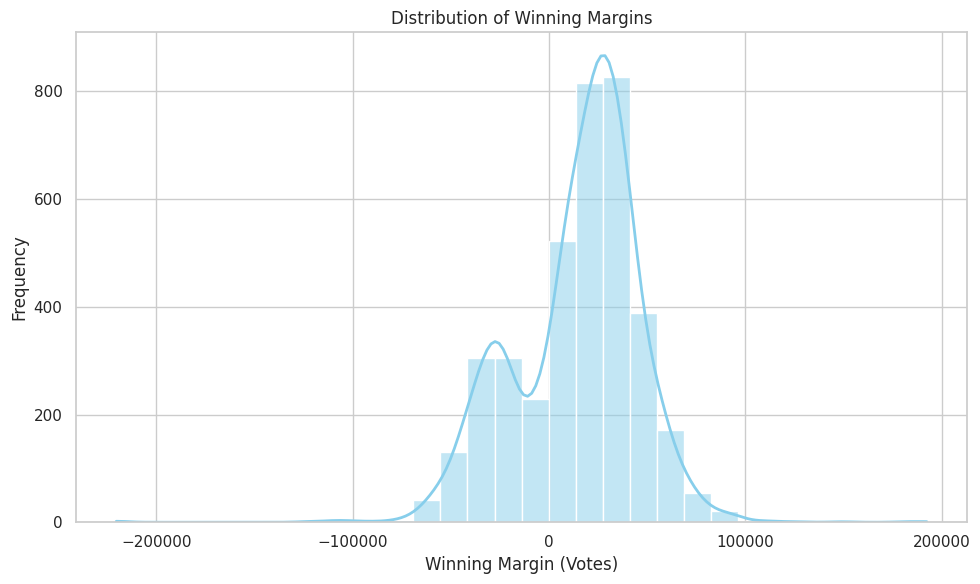

In [35]:
# Plot the distribution of winning margins
plt.figure(figsize=(10,6))
sns.histplot(winners['winning_margin'], bins=30, kde=True, color='skyblue', line_kws={'color': 'purple', 'linewidth': 2})
plt.title('Distribution of Winning Margins')
plt.xlabel('Winning Margin (Votes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## 3.2 How States Voted (Party Preference per State)

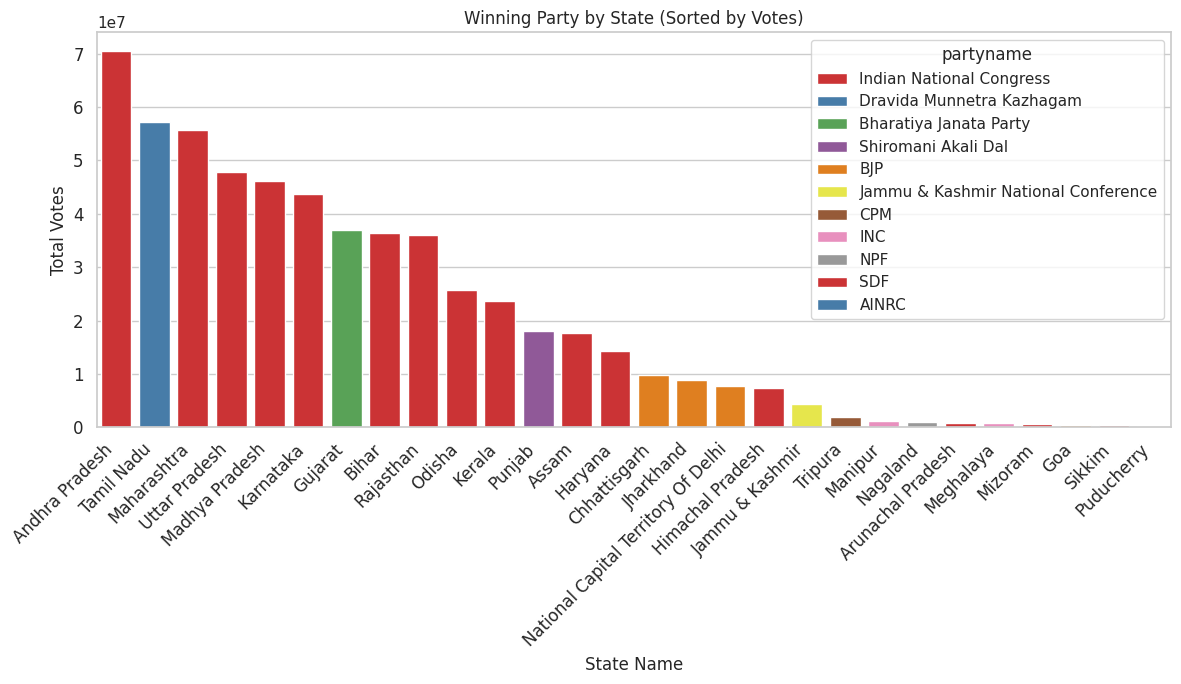

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by state and get the party with the highest total votes
state_party_votes = df_state.groupby(['st_name', 'partyname'])['totvotpoll'].sum().reset_index()

# Find the party with the max votes per state
state_winner = state_party_votes.loc[state_party_votes.groupby('st_name')['totvotpoll'].idxmax()].sort_values(by='totvotpoll', ascending=False) # Sort here

# Plot state party preferences
plt.figure(figsize=(12, 7))
font_name = 'DejaVu Sans'
sns.barplot(x='st_name', y='totvotpoll', hue='partyname', data=state_winner, palette='Set1')
plt.title('Winning Party by State (Sorted by Votes)', fontdict={'fontname': font_name})
plt.xlabel('State Name', fontdict={'fontname': font_name})
plt.ylabel('Total Votes', fontdict={'fontname': font_name})
plt.xticks(rotation=45, ha='right', fontproperties={'family': font_name})
plt.yticks(fontproperties={'family': font_name})
plt.tight_layout()
plt.show()


 ## 3.3 [Tracking a Specific Party’s Seat Count Over Time](#33-tracking-a-specific-partys-seat-count-over-time)

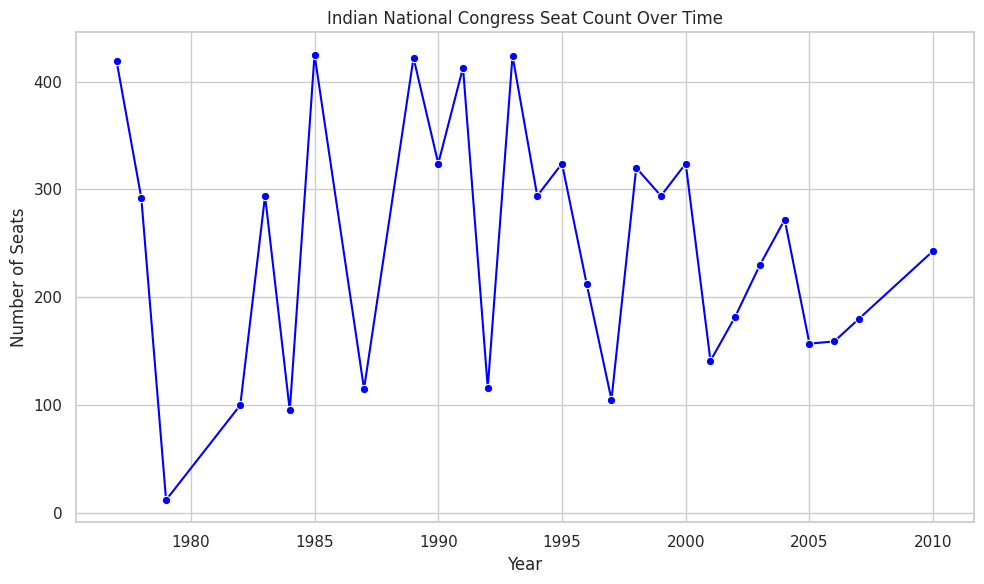

In [37]:

# Choose a specific party (e.g., 'Indian National Congress') or change it to your preferred party
party_name = 'Indian National Congress'

# Filter data for the selected party
party_data = df_state[df_state['partyname'] == party_name]

# Group by year and count the number of seats won by the specific party
party_seats_over_time = party_data.groupby('year')['ac_no'].nunique().reset_index()

# Plot the party seat count over time
plt.figure(figsize=(10,6))
sns.lineplot(data=party_seats_over_time, x='year', y='ac_no', marker='o', color='blue')
plt.title(f'{party_name} Seat Count Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Seats')
plt.tight_layout()
plt.show()

